In [43]:
# Some boilerplate
options(digits = 4)
options(repos="http://cran.us.r-project.org")


Definamos las variables acústico-prosódicas que nos interesan junto a las variables sociales.

In [44]:
ap_vars <- c(
    "ENG_MAX",
    "ENG_MEAN",
    "F0_MEAN",
    "F0_MAX",
    "NOISE_TO_HARMONICS_RATIO",
    "PHONEMES_AVG",
    "PHONEMES_COUNT",
    "SOUND_VOICED_LOCAL_SHIMMER",
    "SYLLABES_AVG",
    "SYLLABES_COUNT",
    "VCD2TOT_FRAMES"
)

social_vars <- c(
  "bored_with_game",
  "difficult_for_partner_to_speak" ,
  "contributes_to_successful_completion",
  "engaged_in_game",
  "gives_encouragement",
  "making_self_clear",
  "planning_what_to_say",
  "dislikes_partner")

get_ap_csv <- function(ap_var) {
    path <- paste("tables/", ap_var, ".csv", sep="")
    dat <- read.csv(path)
    dat["abs_entrainment"] <- abs(dat["entrainment"])
    return (dat)
}



Hagamos un plot, para cada variable a/p, de las distinas variables sociales en función del entrainment; es decir, siendo $X=entrainment$ y $Y=engaged\_in\_game$. Agreguemos a ésto la regresión lineal obtenida de estos datos.

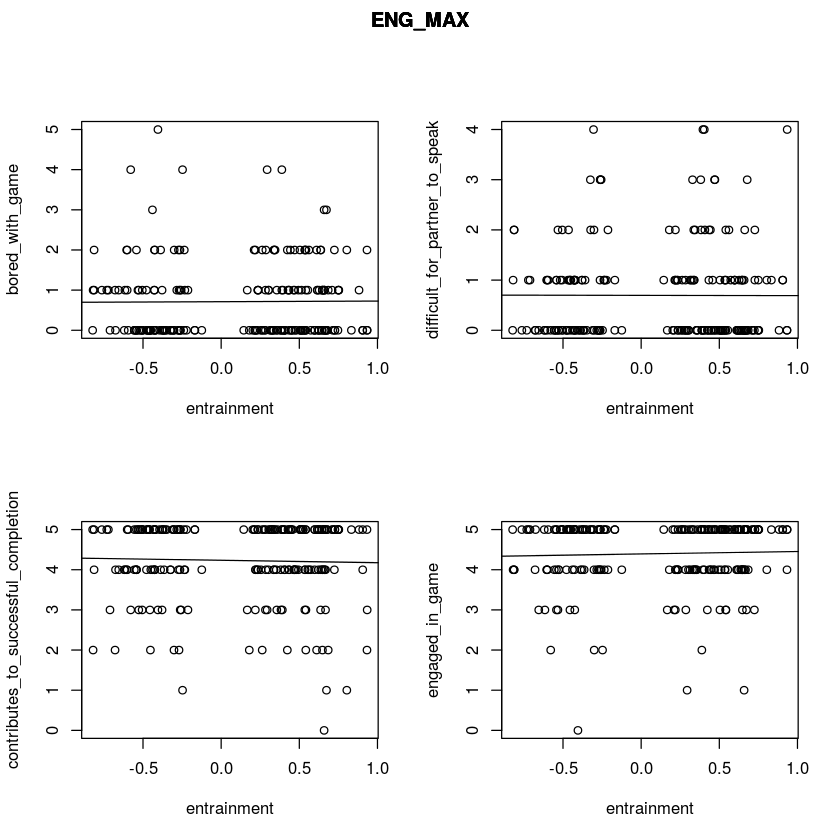

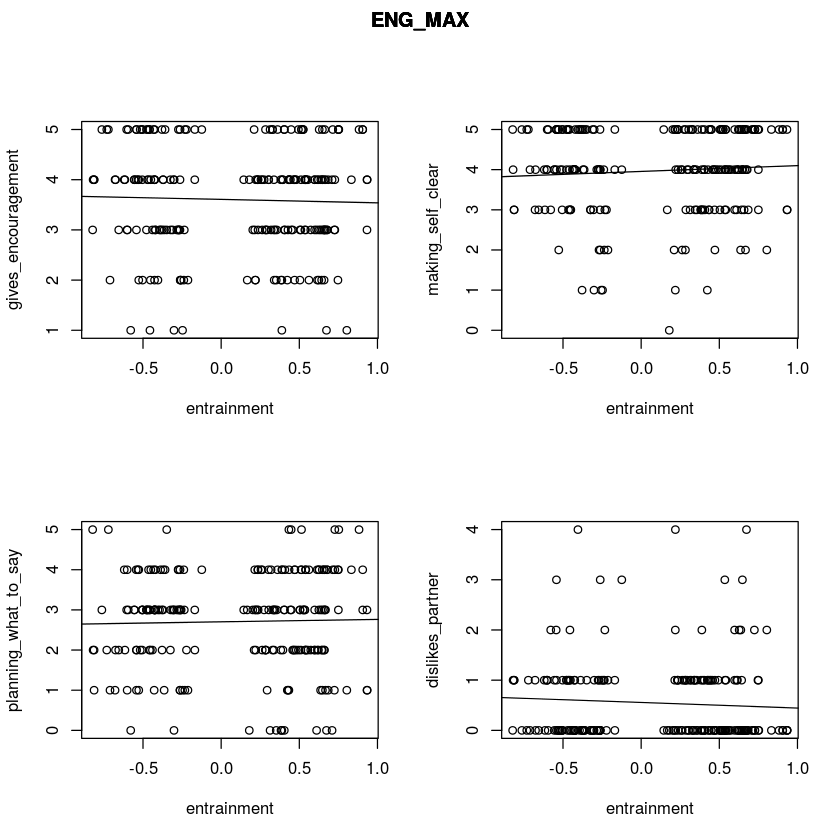

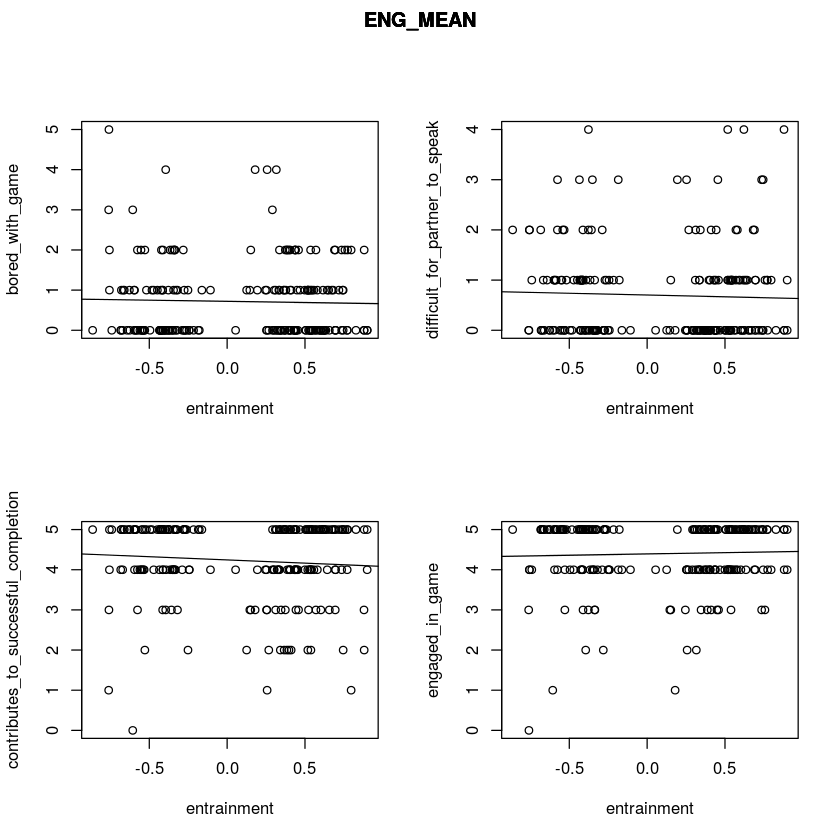

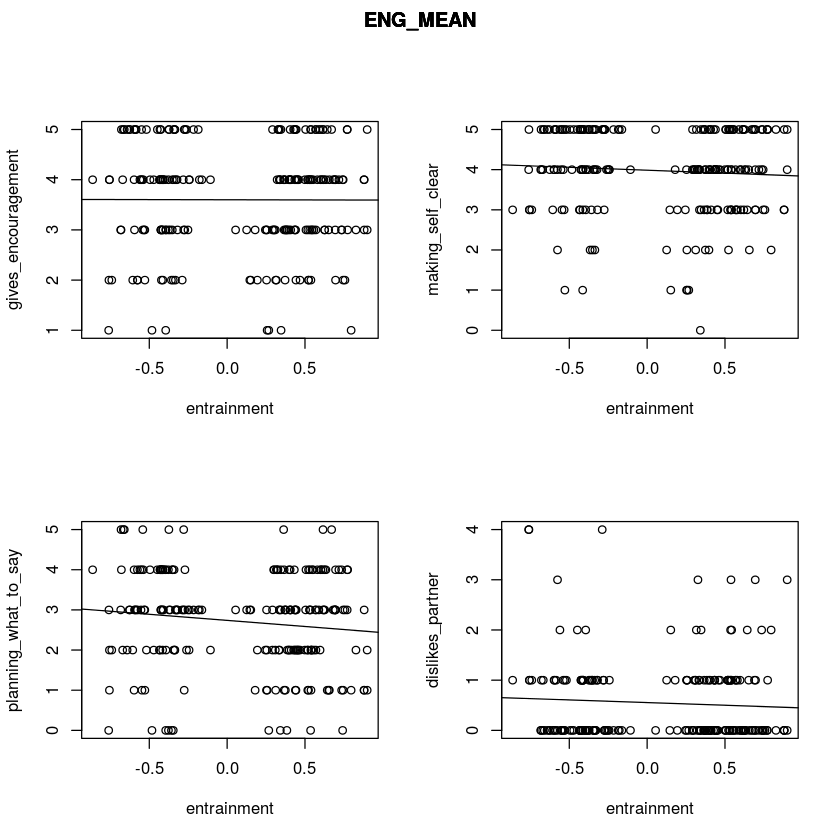

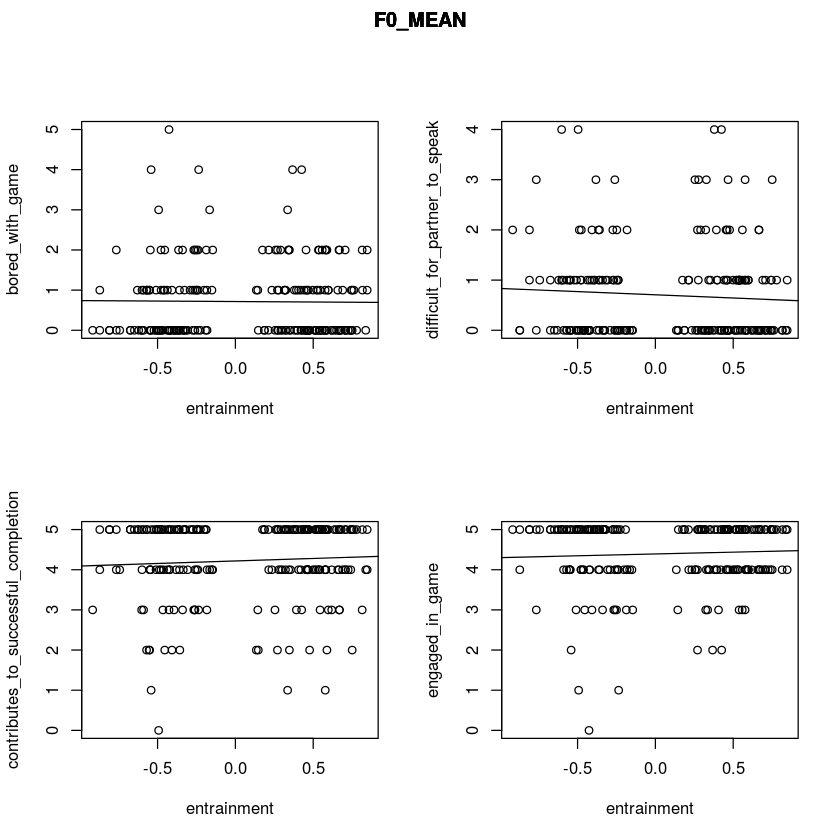

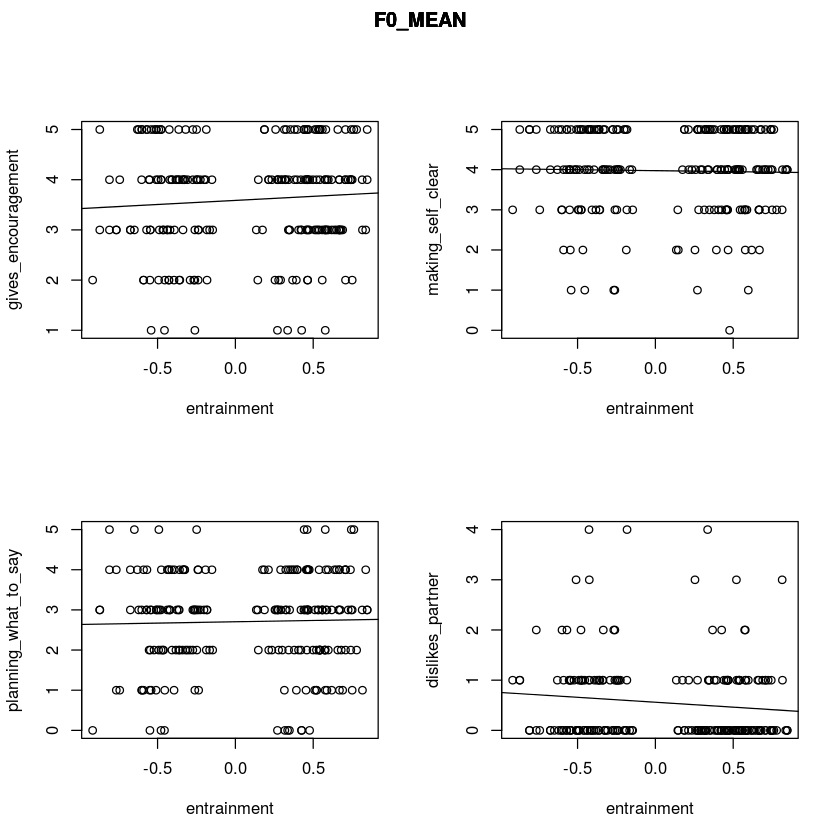

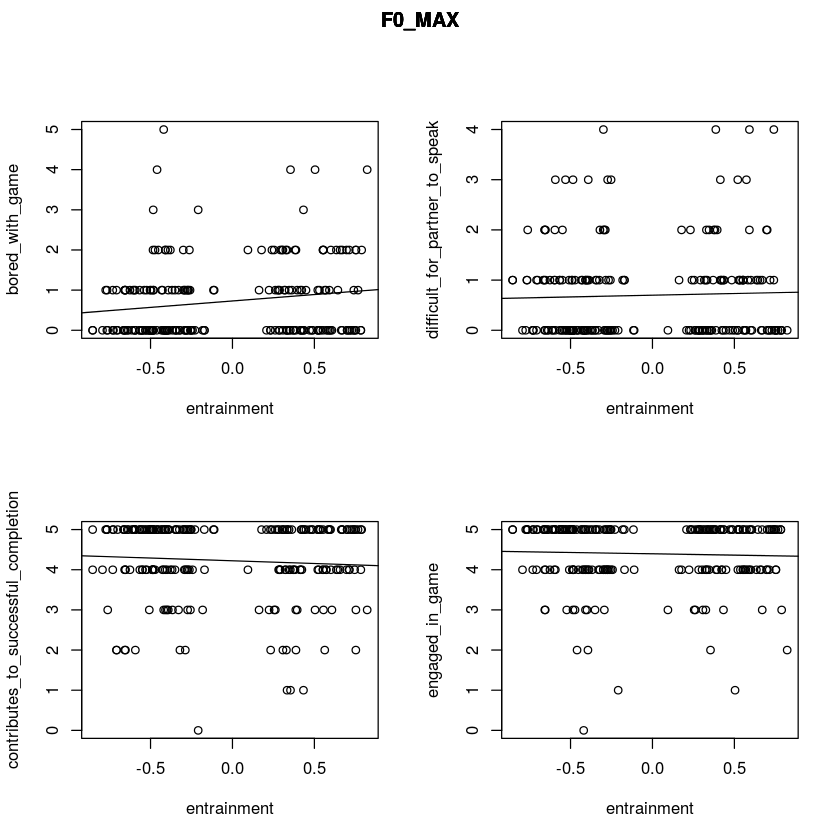

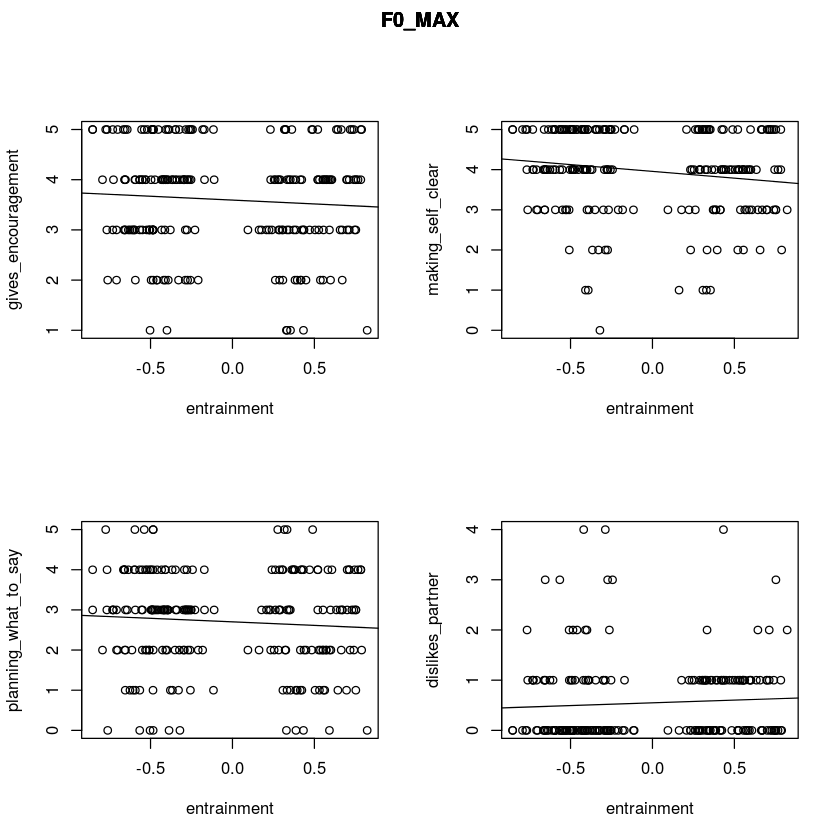

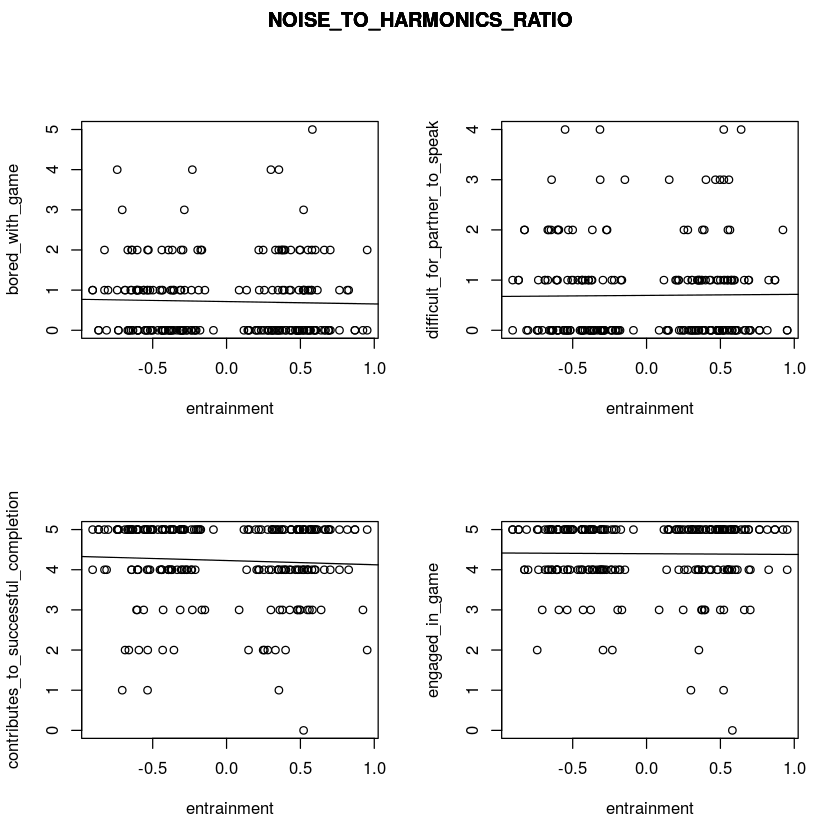

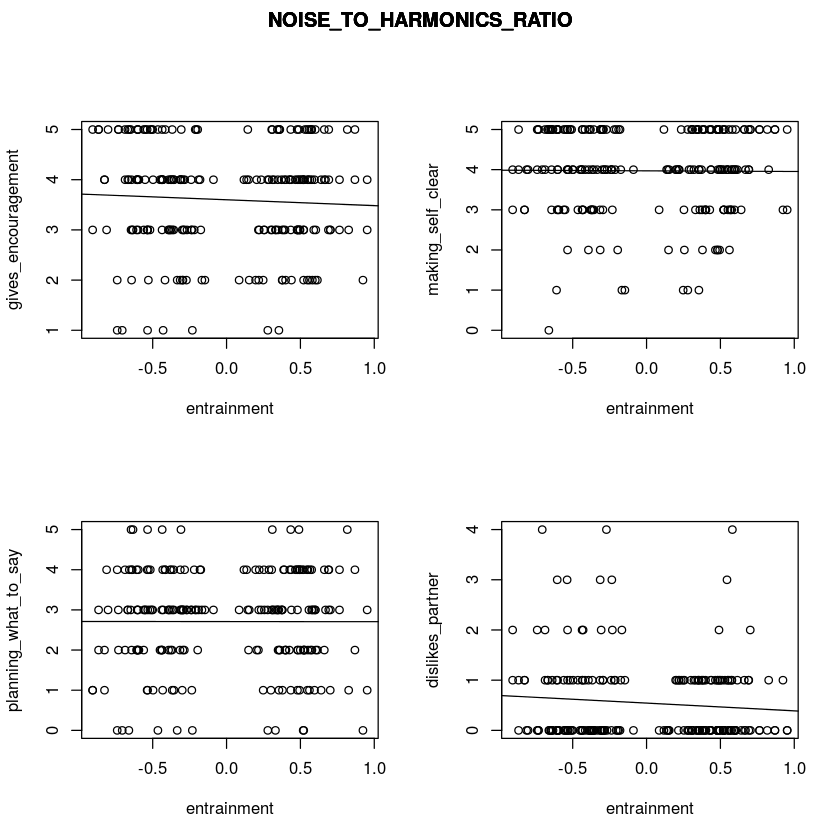

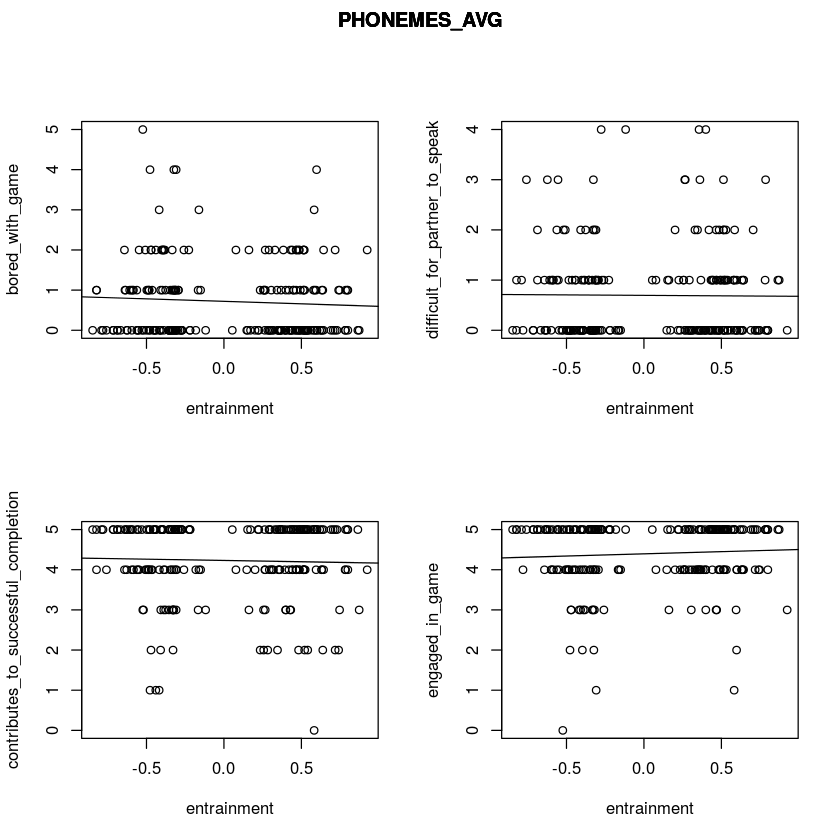

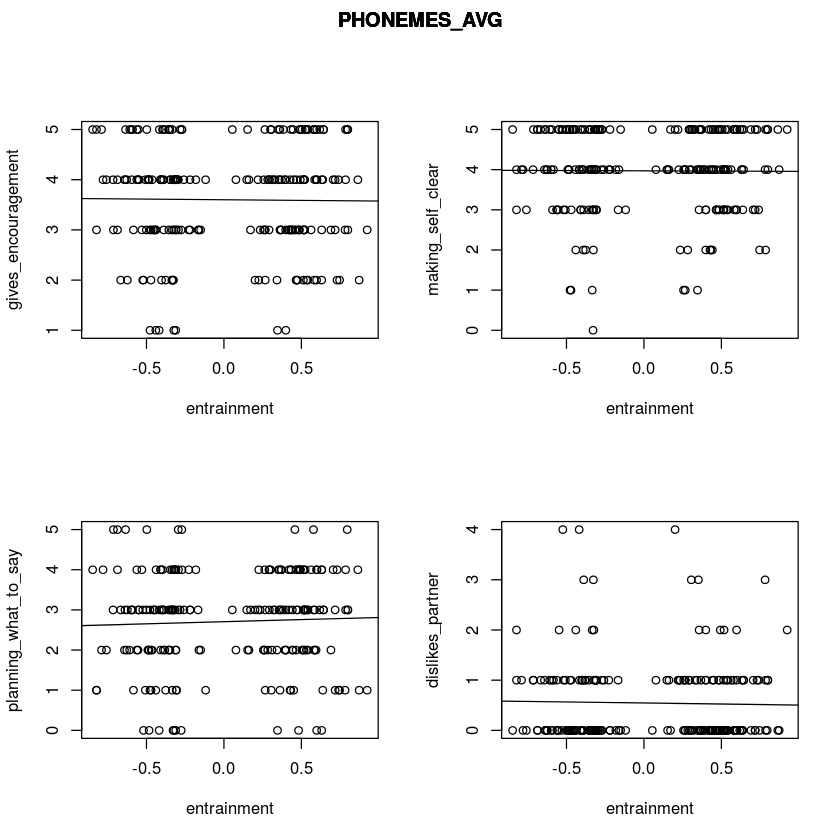

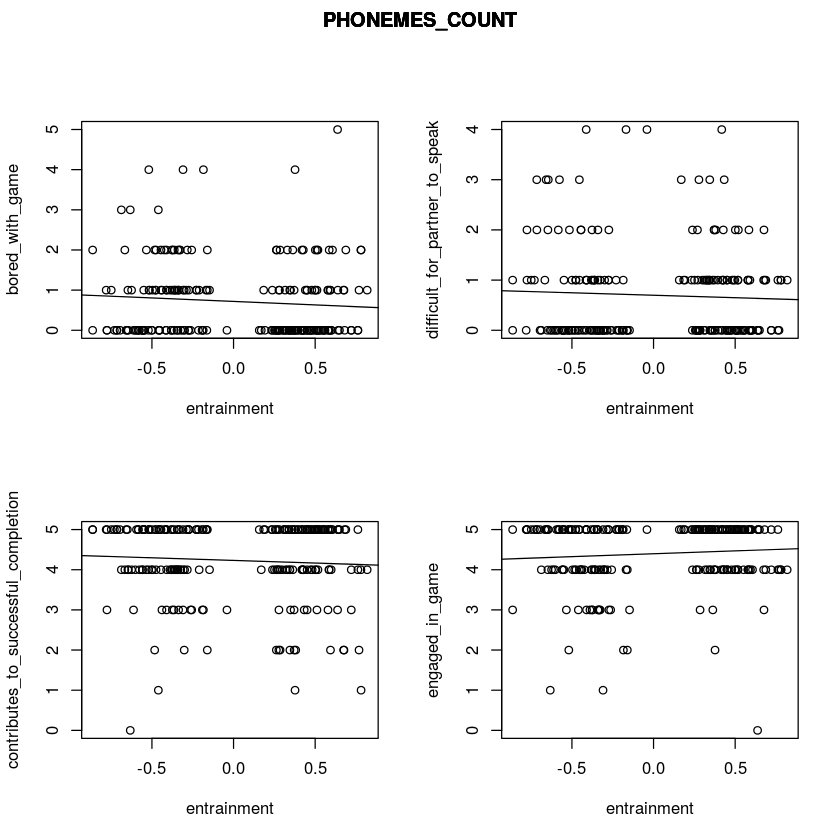

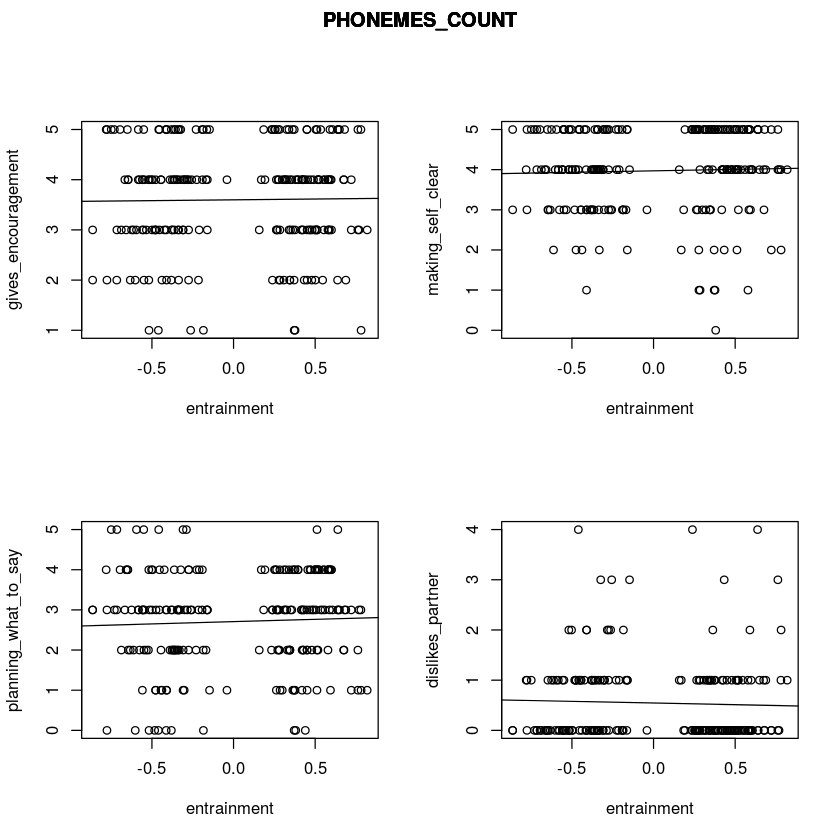

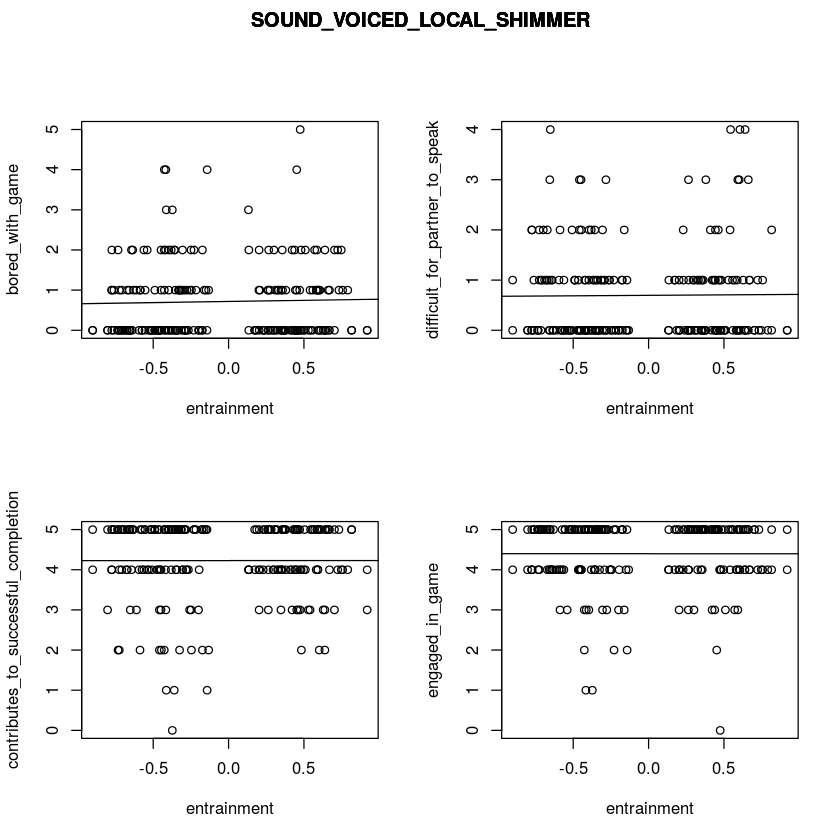

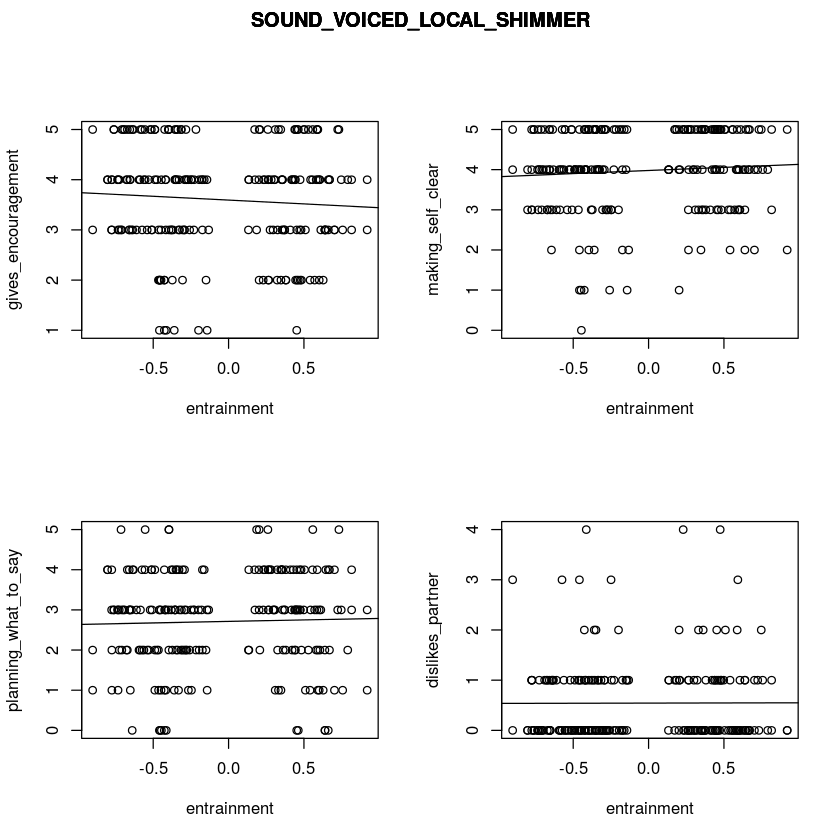

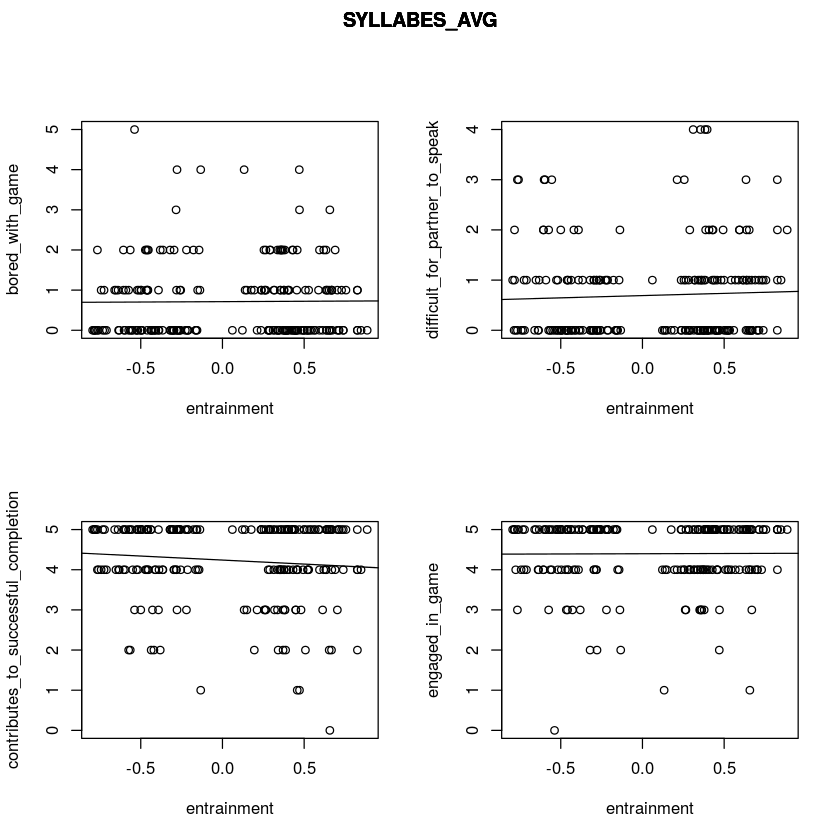

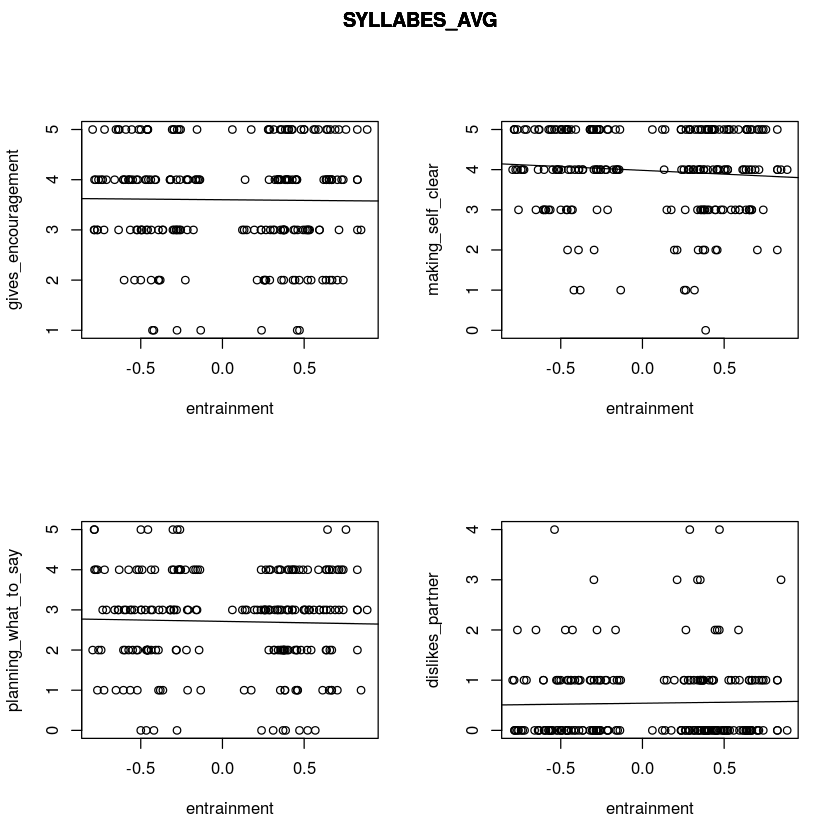

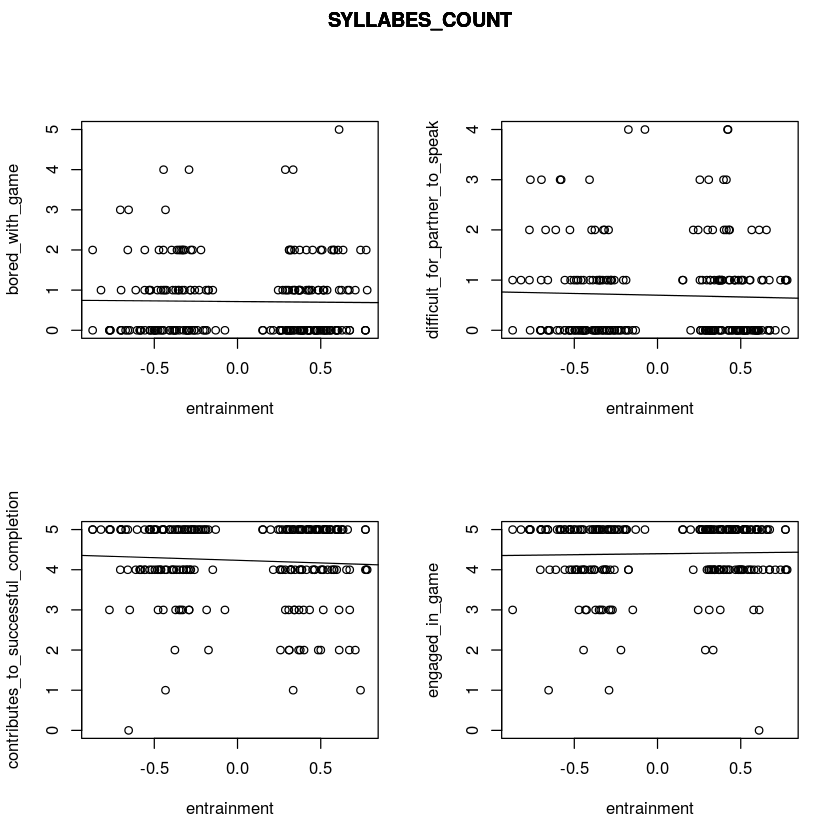

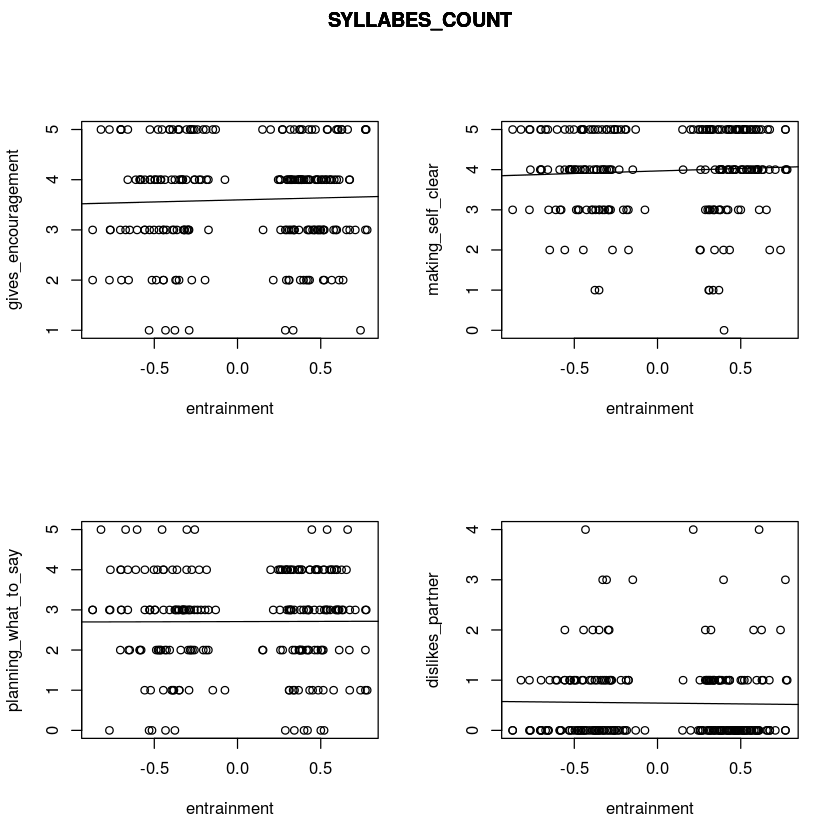

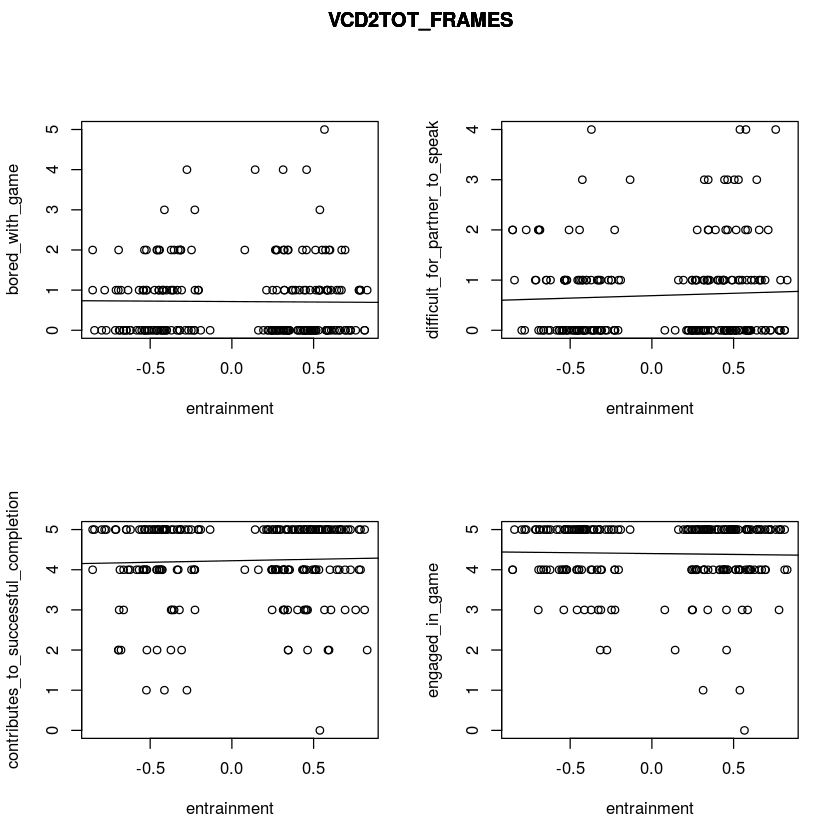

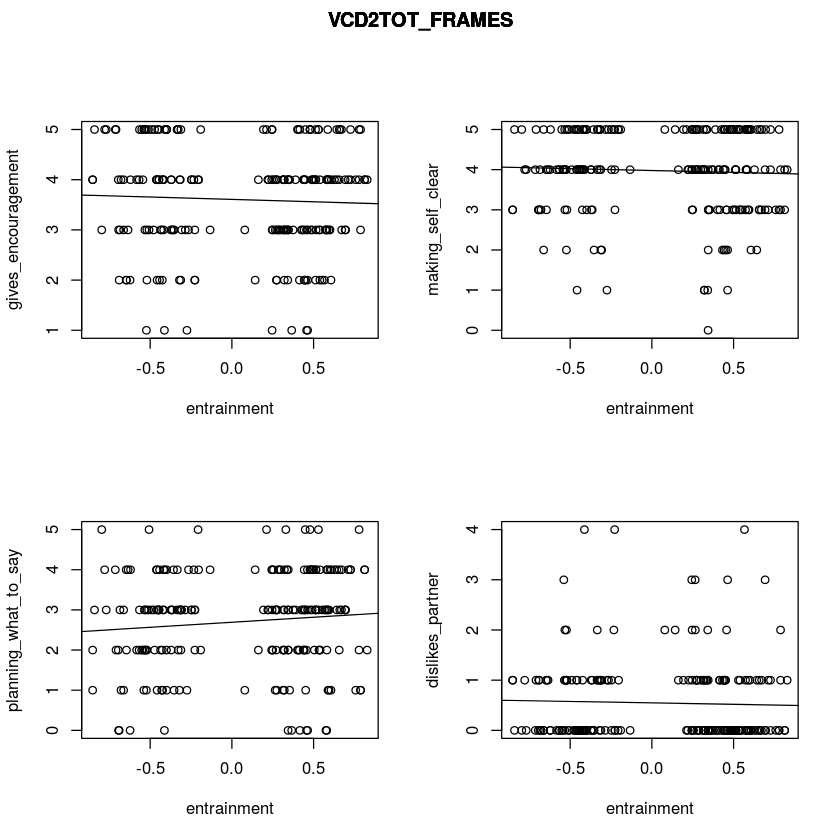

In [45]:

for (ap_var in ap_vars) {
    dat <- get_ap_csv(ap_var)

    par(mfrow=c(2,2), oma=c(0,0,2,0))
    i = 1;

    while ( i <= length(social_vars)) {
        social_var <- social_vars[i]
        subdat <- dat[c("entrainment", social_var)]
        
        
        plot(subdat)
        # 
        regression <- lm(paste(social_var, " ~ entrainment", sep=""), data=dat) 
        abline(regression)
        
        title(ap_var, outer=TRUE)
        if (i == 4) {
          par(mfrow=c(2,2))
        }
        i <- i + 1
    }
}


Ahora vamos a hacer el test de coeficientes para cada uno de éstas regresiones.

Veamos para cada de una de éstas la pendiente 

In [46]:
if (!require("lmtest")) install.packages("lmtest")

# Arma la tabla de regresión, dado un dataframe de una variable a/p

get_regression_table <- function(dat, dependent_variable="entrainment") {
    regression_table <- data.frame()

    for ( social_var in social_vars) {
        regression <- lm(paste(social_var, " ~ ", dependent_variable, sep=""), data=dat) 
        coefs <- coeftest(regression)
        
        # con ésto, me quedo sólo con los outputs del slope
        row <- t(as.numeric(t(coefs))[5:8])
        
        regression_table <- rbind(regression_table, row)
    }
    
    rownames(regression_table) <- social_vars
    colnames(regression_table) <- c("Estimate", "Std. Error", "t value", "Pr(>|t|)")
    
    return(regression_table)
}    

for (ap_var in ap_vars) {
    dat <- get_ap_csv(ap_var)
    
    cat("\n")
    print(ap_var)
    cat("\n")
    

    print(get_regression_table(dat))
}




[1] "ENG_MAX"

                                      Estimate Std. Error  t value Pr(>|t|)
bored_with_game                       0.015808     0.1327  0.11909   0.9053
difficult_for_partner_to_speak       -0.005272     0.1305 -0.04039   0.9678
contributes_to_successful_completion -0.059031     0.1401 -0.42134   0.6739
engaged_in_game                       0.061799     0.1179  0.52408   0.6008
gives_encouragement                  -0.067715     0.1487 -0.45525   0.6494
making_self_clear                     0.146609     0.1477  0.99278   0.3220
planning_what_to_say                  0.061251     0.1691  0.36216   0.7176
dislikes_partner                     -0.110691     0.1129 -0.98059   0.3279

[1] "ENG_MEAN"

                                      Estimate Std. Error  t value Pr(>|t|)
bored_with_game                      -0.058659     0.1326 -0.44229  0.65874
difficult_for_partner_to_speak       -0.070494     0.1304 -0.54065  0.58933
contributes_to_successful_completion -0.160482     0.13

## Absolute entrainment

Probemos ahora con absolute entrainment

In [47]:
for (ap_var in ap_vars) {
    dat <- get_ap_csv(ap_var)
    
    cat("\n")
    print(ap_var)
    cat("\n")
    

    print(get_regression_table(dat, dependent_variable = "abs_entrainment"))
}



[1] "ENG_MAX"

                                     Estimate Std. Error t value Pr(>|t|)
bored_with_game                       0.09735     0.3655  0.2663  0.79025
difficult_for_partner_to_speak       -0.44468     0.3582 -1.2415  0.21582
contributes_to_successful_completion -0.21888     0.3857 -0.5674  0.57103
engaged_in_game                       0.35513     0.3241  1.0959  0.27439
gives_encouragement                   0.61414     0.4076  1.5065  0.13344
making_self_clear                     1.19944     0.3991  3.0053  0.00298
planning_what_to_say                  0.07329     0.4659  0.1573  0.87516
dislikes_partner                     -0.41683     0.3103 -1.3434  0.18059

[1] "ENG_MEAN"

                                     Estimate Std. Error  t value Pr(>|t|)
bored_with_game                      -0.14596     0.3828 -0.38132  0.70336
difficult_for_partner_to_speak        0.61775     0.3741  1.65124  0.10020
contributes_to_successful_completion  0.44906     0.4031  1.11392  0.26660
e